## Chroma Synthesis
### Examples

In [1]:
import matplotlib.pyplot as plt
from chroma import Cynthesis
import librosa
from librosa.display import specshow, waveshow
import numpy as np
import soundfile as sf
import IPython.display  as ipd

In [2]:
# Define Synthesizer
n_fft = 2048
win_length = 1024
hop_length = 512
cynthesizer = Cynthesis(n_fft=n_fft, win_length=win_length, hop_length=hop_length, f_ctr=1000, f_sd=1)

In [3]:
def display_result(sig, syn_sig, chroma, suptitle='', save_fn = '', sr = 22050):
    fig = plt.figure(constrained_layout = True, figsize = (15, 15))
    mosaic = '''
    AB
    CC
    DD
    EE
    '''
    axes = fig.subplot_mosaic(mosaic)
    
    ## Time Domain 
    waveshow(sig, ax = axes['A'])
    waveshow(syn_sig, ax = axes['B'])
    axes['A'].set(title = 'Oiginal Sound')
    axes['B'].set(title = 'Chroma Synthesized Sound')
    
    ## Frequency Domain
    D_org = librosa.amplitude_to_db(np.abs(librosa.stft(sig)))
    C_dB=librosa.amplitude_to_db(chroma)
    cr = np.max(C_dB) - np.array([60, 0])
    D_syn =  librosa.amplitude_to_db(np.abs(librosa.stft(syn_sig)))

    specshow( D_org,x_axis = 'time', y_axis = 'linear', cmap = 'jet', ax = axes['C'])
    specshow( C_dB, x_axis = 'time', cmap = 'jet', vmin = cr[0], vmax = cr[1], ax = axes['D'])
    specshow(D_syn,x_axis = 'time', y_axis = 'linear', cmap = 'jet', ax = axes['E'])


    axes['C'].set(title = 'Original Sound', ylim = [0, 4000])
    axes['D'].set(title = 'Chromagram')
    axes['E'].set(title = 'Chroma Synthesized Sound', ylim = [0, 4000])
    
    fig.suptitle(suptitle, fontsize = 20)    
    fig.savefig(f'./examples/{save_fn}.jpg')

    
    ## Audio Display
    print('Original Sound')
    ipd.display(ipd.Audio(sig,rate = sr))
    print('Chroma Synthesized Sound')
    ipd.display(ipd.Audio(syn_sig,rate = sr))
    
    # Save synthesized audio file
    sf.write( f'./examples/{save_fn}.wav', syn_sig, samplerate=sr)

Original Sound


Chroma Synthesized Sound


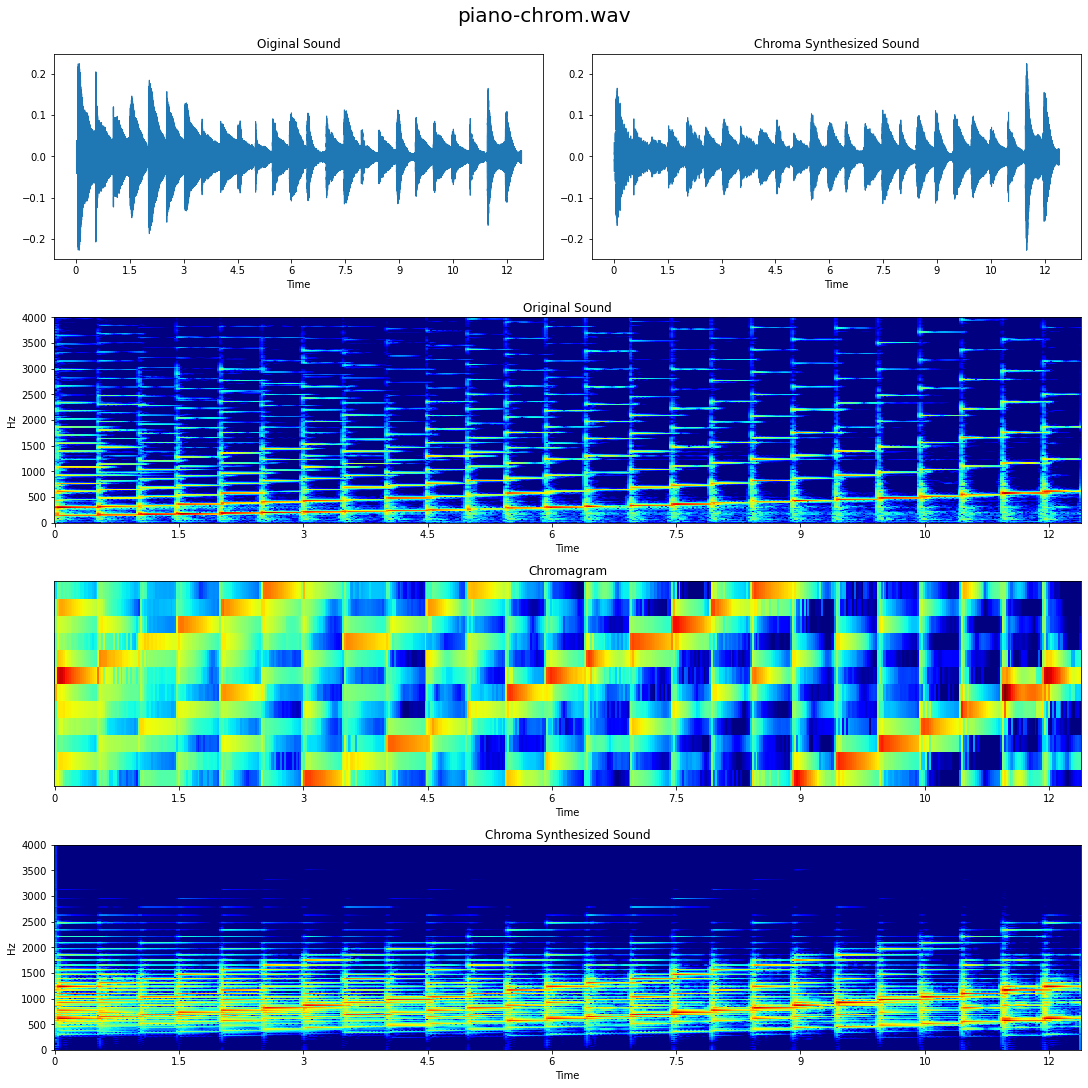

In [4]:
sig1, sr = librosa.load('../chroma-ansyn/piano-chrom.wav')
syn_sig1 = cynthesizer(sig1)
display_result(sig1, syn_sig1, cynthesizer.chroma, suptitle='piano-chrom.wav', save_fn='cyn_ex_piano')

Original Sound


Chroma Synthesized Sound


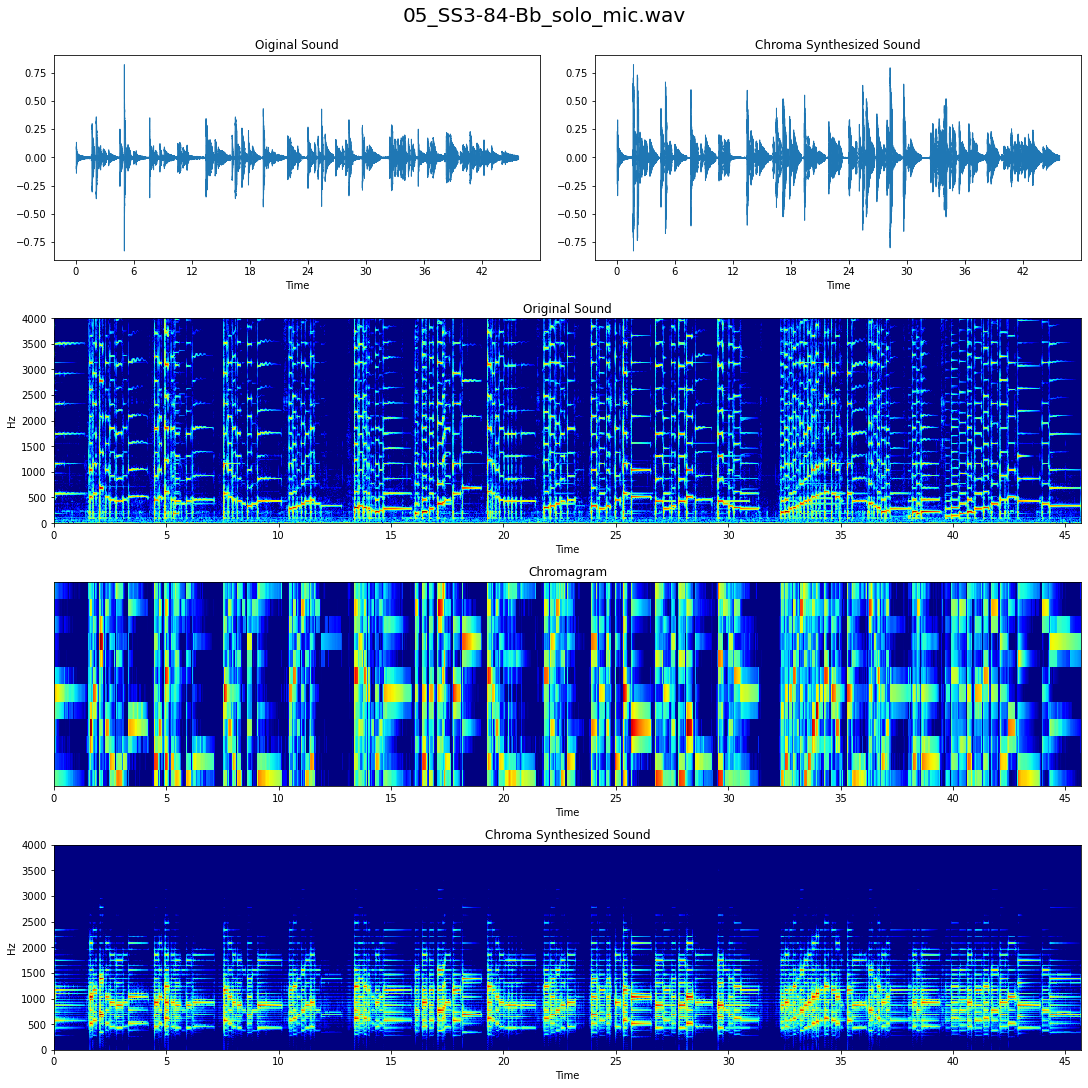

In [5]:
sig2, sr = librosa.load('../dataset/GuitarSet/audio_mono-mic/05_SS3-84-Bb_solo_mic.wav')
syn_sig2 = cynthesizer(sig2)
display_result(sig2, syn_sig2, cynthesizer.chroma, suptitle='05_SS3-84-Bb_solo_mic.wav', save_fn='cyn_ex_guitar')